In [1]:
# moutn google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
# go into the file directory
%cd "/gdrive/MyDrive/datasets/dataset/"
%ls

/gdrive/MyDrive/datasets/dataset
images/  masks/


In [3]:
!pip install nibabel SimpleITK torchmed medpy matplotlib

     |████████████████████████████████| 48.4 MB 2.2 MB/s 
     |████████████████████████████████| 151 kB 58.0 MB/s 
  Created wheel for medpy: filename=MedPy-0.4.0-cp37-cp37m-linux_x86_64.whl size=754467 sha256=4fc943521358c64ba22e90b3b452218211ab36dd6c25ee7c10d240fa1dfe8da4
  Stored in directory: /root/.cache/pip/wheels/b0/57/3a/da1183f22a6afb42e11138daa6a759de233fd977a984333602
Successfully built medpy


In [4]:
from matplotlib import pylab as plt
import nibabel as nib
from nibabel import nifti1
from nibabel.viewers import OrthoSlicer3D

In [5]:
# print the header of the file
image = nib.load('./images/coronacases_010.nii.gz')
mask = nib.load('./masks/coronacases_010_mask.nii.gz')
print("Image shape: ", image.shape)
print("Mask shape: ", mask.shape)
print('\n', "#" * 10, " Image header ", "#" * 10, '\n')
print(image.header) # output header information
print('\n', "#" * 10, " Mask header ", "#" * 10, '\n')
print(mask.header) # output header information

Image shape:  (512, 512, 301)
Mask shape:  (512, 512, 301)

 ##########  Image header  ########## 

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3 512 512 301   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.        0.683594  0.683594  1.        1.        1.        1.
  1.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : unknown
sform_code      : aligned
quatern_b       : 0.0
quatern_c       

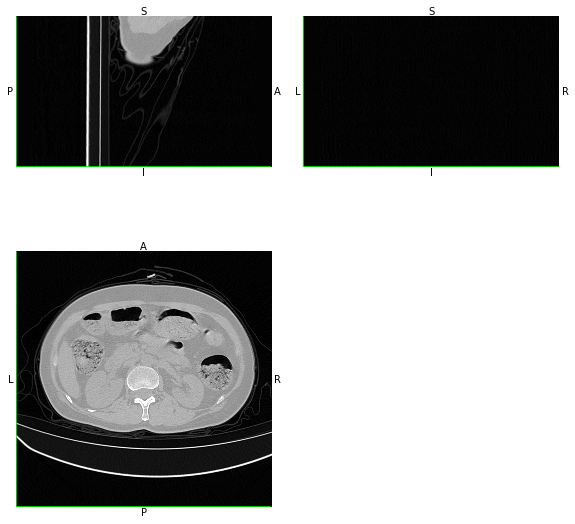

In [6]:
# 3D inspect the file
#shape has four parameters scan.nii.gz
width, height, queue = image.dataobj.shape
OrthoSlicer3D(image.dataobj).show()

In [7]:
# get numpy array out of nibabel object
image_data = image.get_fdata()
mask_data = mask.get_fdata()

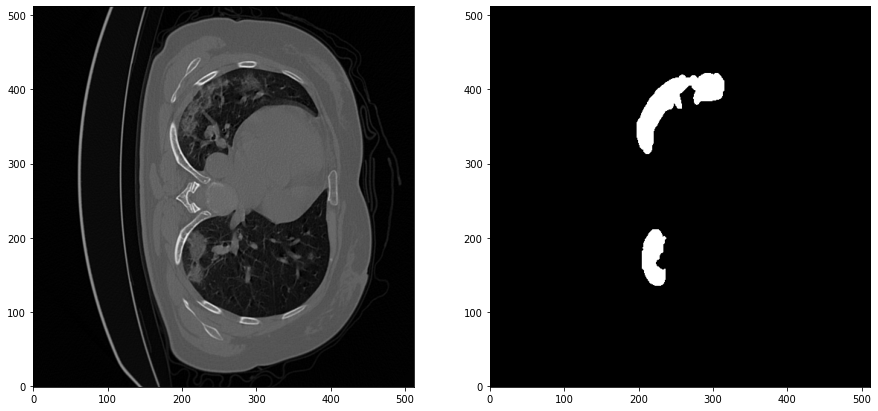

In [8]:
# plot 
fig, axes = plt.subplots(1, 2, figsize=(15, 30))
axes[0].imshow(image_data[:,:,150], cmap="gray", origin="lower")
axes[1].imshow(mask_data[:,:,150], cmap="gray", origin="lower")

In [9]:
def show_slices(slices):
   """ Function to display row of image slices """
   fig, axes = plt.subplots(1, len(slices), figsize=(30, 10))
   for i, slice in enumerate(slices):
       axes[i].imshow(slice.T, cmap="gray", origin="lower")

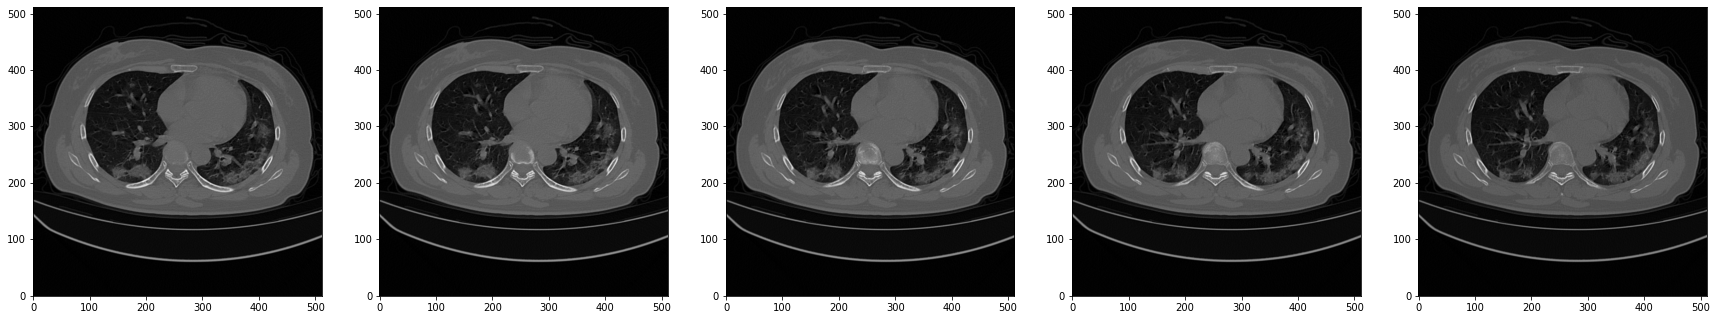

In [12]:
show_slices([image_data[:, :, i] for i in range(150,155)])

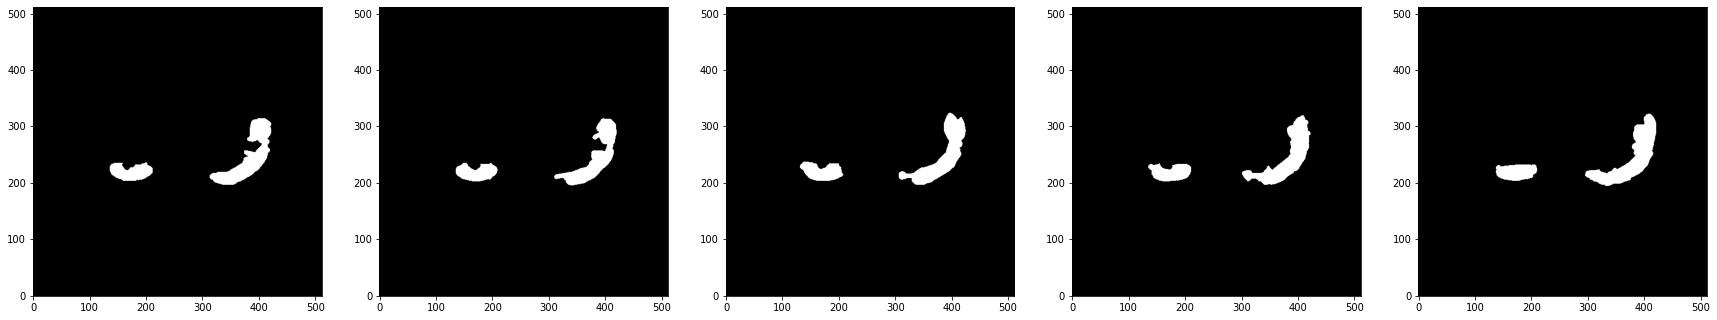

In [14]:
show_slices([mask_data[:, :, i] for i in range(150,155)])

(301, 512, 512)


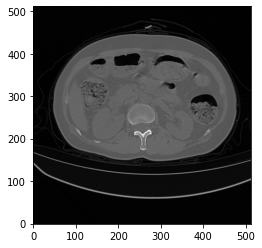

In [18]:
# using SimpleITK library
import SimpleITK as sitk
import matplotlib.pyplot as plt

image = sitk.ReadImage('./images/coronacases_010.nii.gz')
image = sitk.GetArrayFromImage(image)
print(image.shape)
plt.imshow(image[0], cmap="gray", origin="lower")

torch.Size([301, 512, 512])


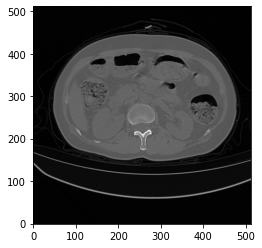

In [20]:
# using torchmed library
import torchmed
image = torchmed.readers.SitkReader('./images/coronacases_010.nii.gz').to_torch()
print(image.shape)
plt.imshow(image[0], cmap="gray", origin="lower")